In [1]:
%%bash
# pip3 install pyclustering
# which jupyter
# which jupyter-notebook
# which conda
# conda install -U scikit-learn scipy matplotlib
# conda config --add channels conda-forge
# conda config --set channel_priority strict
# conda install pyclustering

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# for medoids
# from sklearn_extra.cluster import KMedoids # no way to install
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from sklearn_extra.cluster import KMedoids


%matplotlib inline

In [43]:
df = pd.read_csv('rawdata200K.dat', delim_whitespace=True)
df.columns = ["X", "Y"]


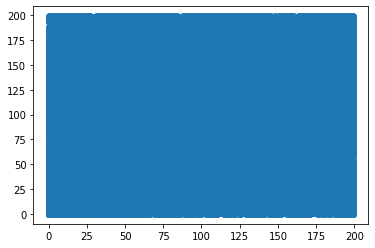

In [44]:
plt.scatter(df.X, df.Y)

In [45]:
# Scale data
k_means = KMeans(n_clusters=3)

In [46]:
cluster = k_means.fit_predict(df[['X', 'Y']])
df['cluster'] = cluster

In [47]:
# Visualize cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

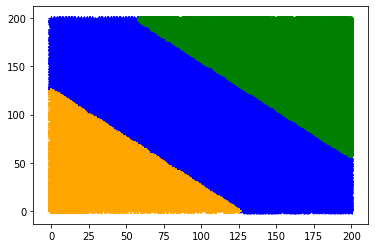

In [48]:
plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of X, Y using K Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [49]:
scaler = MinMaxScaler()
df.X = scaler.fit(df[['X']]).transform(df[['X']])
df.Y = scaler.fit(df[['Y']]).transform(df[['Y']])

In [50]:
# Retrain or recompute cluster
cluster = k_means.fit_predict(df[['X', 'Y']])
df['cluster'] = cluster

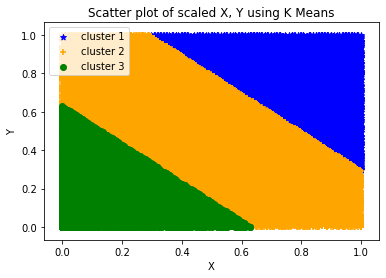

In [51]:
# plot it
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [52]:
# Elbow plot method - find best k value
k_list = range(1, 10)
sse = []

for k in k_list:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df[['X', 'Y']])
    sse.append(k_means.inertia_)

In [53]:
sse

[34924.362078203754,
 12365.059856860149,
 7533.189682911524,
 5669.981222314085,
 4569.055640108615,
 3310.7041860175996,
 2560.328492063831,
 1846.461340382756,
 1632.8656684538844]

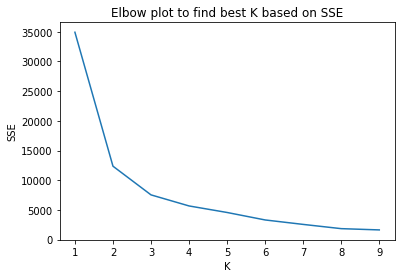

In [54]:
plt.title('Elbow plot to find best K based on SSE')

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_list, sse)

In [15]:
# USING K Medoids

# df = pd.read_csv('./rawdata10K.dat', delim_whitespace=True)
# df.columns = ["Age", "Income"]

#scaler = MinMaxScaler()
# df.Income = scaler.fit(df[['Income']]).transform(df[['Income']])
# df.Age = scaler.fit(df[['Age']]).transform(df[['Age']])


In [55]:
sample = df.values.tolist() # read_sample('./rawdata10K.dat')
k_medoids_instance = kmedoids(sample, [12, 16, 17])


k_medoids_instance.process()
clusters = k_medoids_instance.get_clusters()
medoids = k_medoids_instance.get_medoids()

print(medoids)


[125821, 61572, 25607]


In [ ]:
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

In [39]:
# Visualize medoids using plot

df1 = df[df.index.isin(clusters[0])]
df2 = df[df.index.isin(clusters[1])]
df3 = df[df.index.isin(clusters[2])]

#df1.columns = ["Age", "Income"]                                           
#df2.columns = ["Age", "Income"]
#df3.columns = ["Age", "Income"]


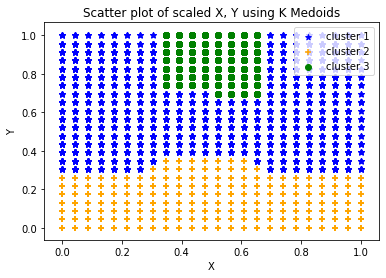

In [42]:
plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Medoids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()